### Importing Libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt#for visualisation
from sklearn.model_selection import train_test_split #for splitting data into training and test data
from sklearn.metrics import classification_report #for classification report
from sklearn.linear_model import LogisticRegression #Doing logistic regression
from sklearn.preprocessing import StandardScaler #for normalising data


In [29]:
data=pd.read_csv('salarydata.csv')
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [30]:
data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [32]:
data.shape

(32561, 14)

### Cleaning the Dataset

In [33]:
#Check for Missing values
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

While analyzing the dataset, it is clear that capital-gain & capital_loss have no significance in salary prediction. so we can drop it. The column,education-num is the numerical version of the column education, so we also drop it.

In [34]:
data.drop(['capital-gain','capital-loss','education-num'], axis = 1,inplace = True)
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [35]:
data.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [36]:
data.describe()

,age,hours-per-week
count,32561.000000,32561.000000
mean,38.581647,40.437456
std,13.640433,12.347429
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


In [56]:
#Checking categorical columns
for i in data.iloc[:,2:].columns:
    print("{} : {}".format(i,list(pd.unique(data[i]))))
    
#found that '?' in columns occupation, workclass, and native-country    

workclass : ['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', 'Self-emp-inc', 'Without-pay']
education : ['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college', 'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school', '5th-6th', '10th', 'Preschool', '12th', '1st-4th']
marital-status : ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed']
occupation : ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support', 'Craft-repair', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']
relationship : ['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried', 'Other-relative']
race : ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
sex : ['Male', 'Female']
native-country : ['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'Puerto-Rico', '

## Exploratory Data Analysis

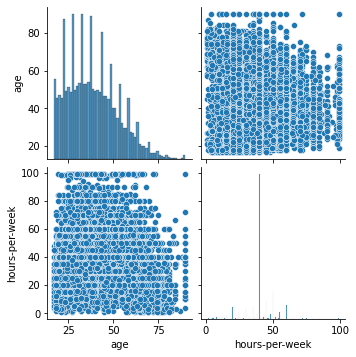

In [37]:
sns.pairplot(data)

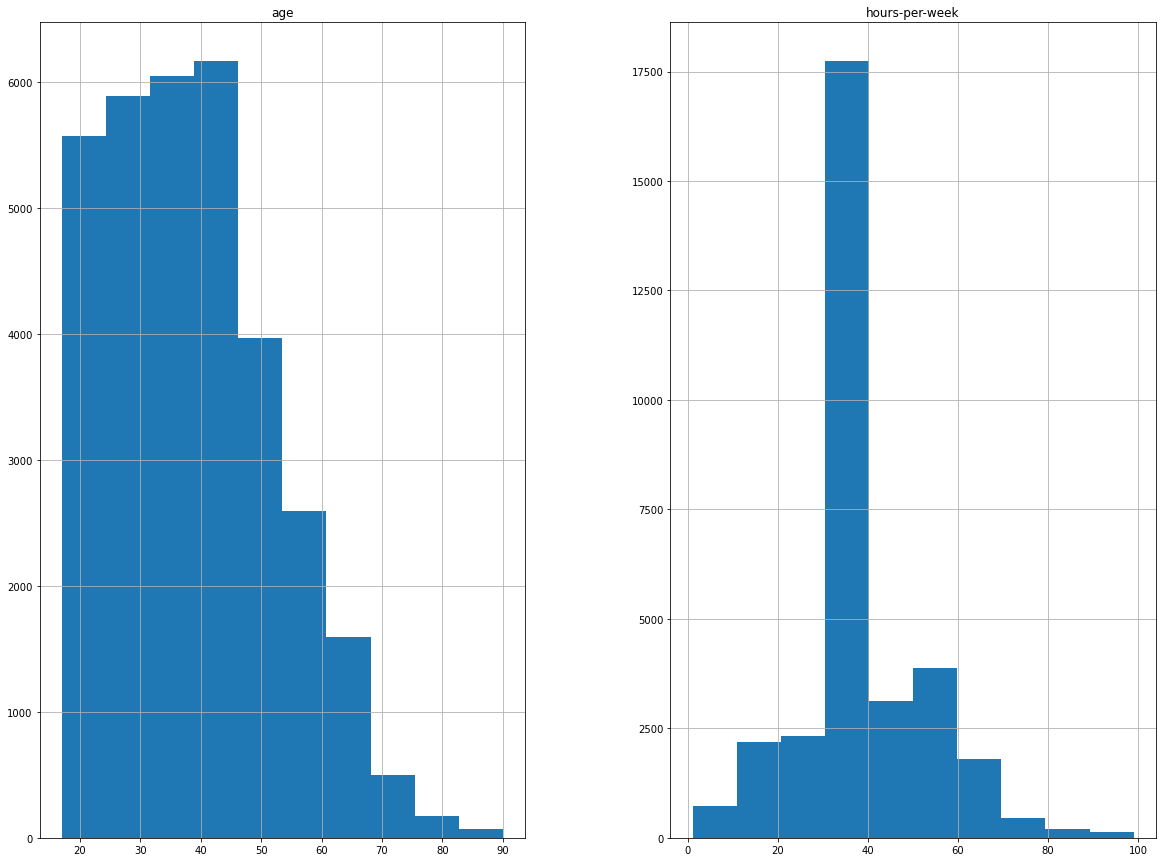

In [38]:
data.hist(figsize=(20,15))
plt.show()

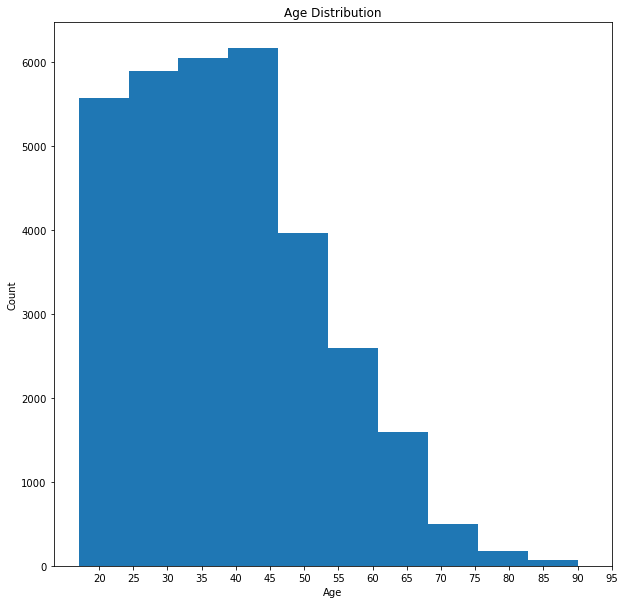

In [39]:
#We can check the above using some representations like graphs, barplots, etc

#checking age

plt.hist(data['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(np.arange(20,100,5))
plt.rcParams['figure.figsize'] = (8,8)
plt.title('Age Distribution')
plt.show()

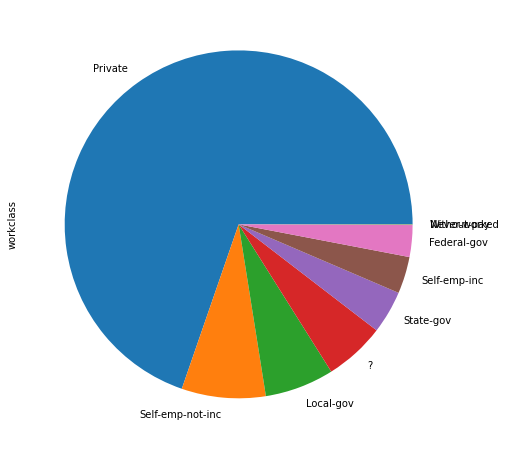

In [40]:
#checking workclass

data['workclass'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

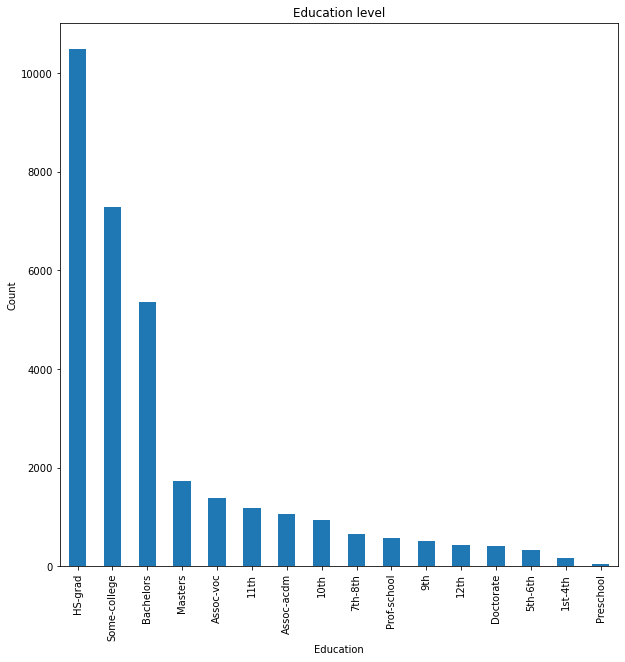

In [41]:
#checking education

data['education'].value_counts().plot(kind = 'bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Education level')
plt.show()

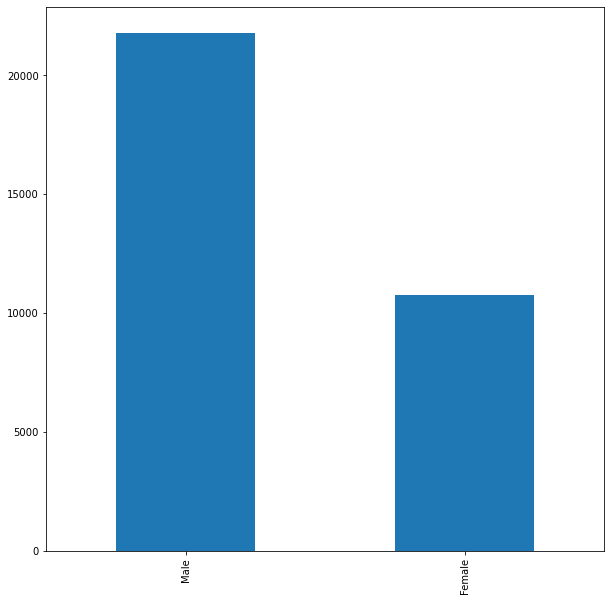

In [42]:
#checking sex

data['sex'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

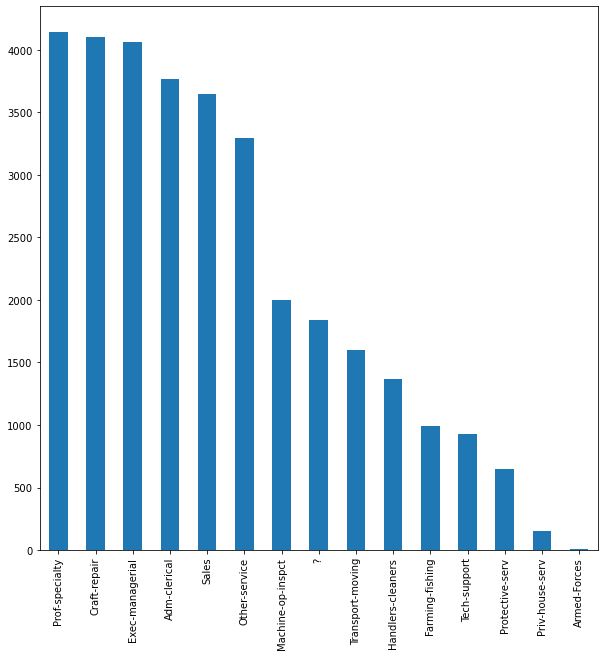

In [43]:
#checking occupation

data['occupation'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

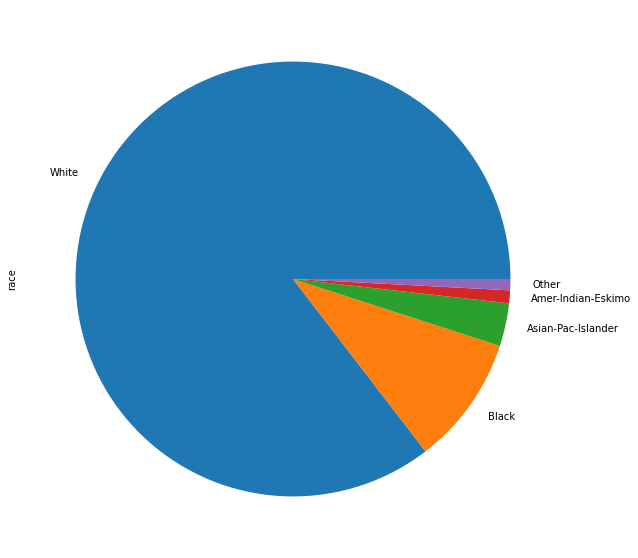

In [44]:
#Checking race

data['race'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

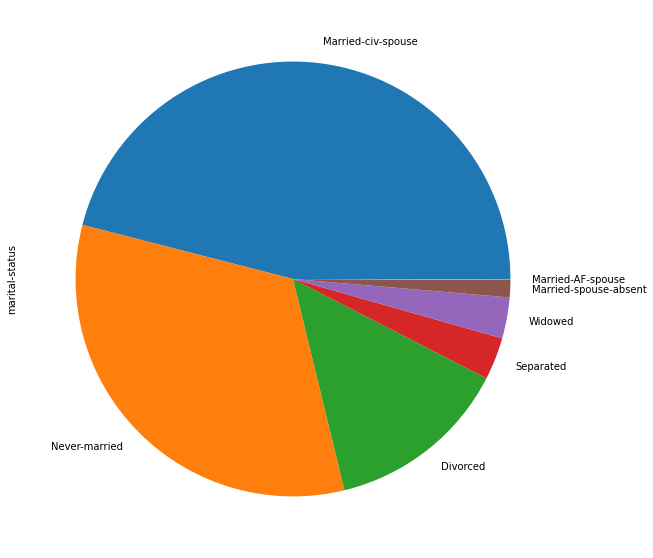

In [45]:
#checking marital-status

data['marital-status'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

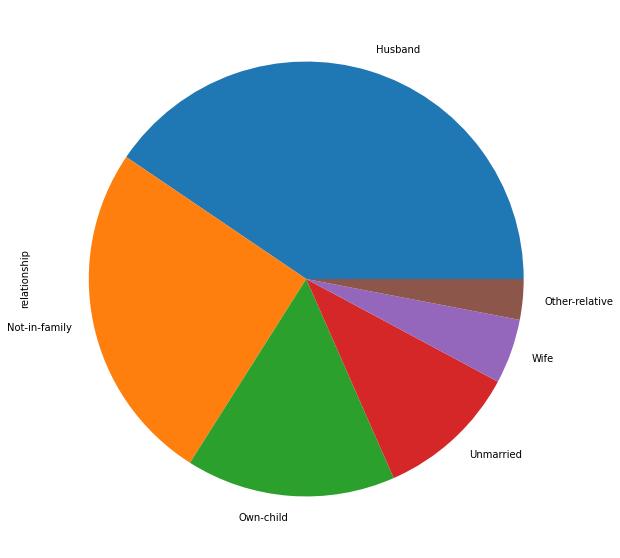

In [46]:
#checking relationship

data['relationship'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

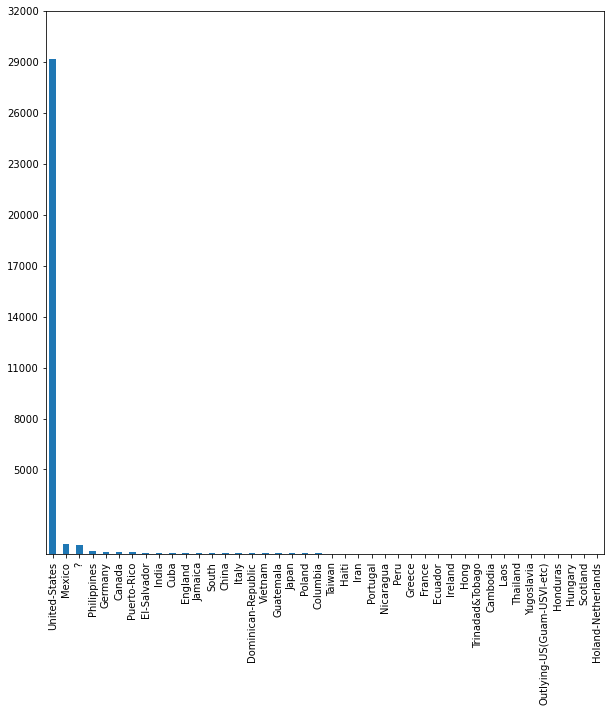

In [47]:
#checking native-country

data['native-country'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.yticks(np.arange(5000,33000,3000))
plt.show()

In [48]:
#findind the record where '?' appears in columns occupation, workclass, and native-country

data.loc[(data['occupation'] == '?') | (data['workclass'] == '?') | (data['native-country'] == '?')]

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
14,40,Private,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,40,?,>50K
27,54,?,Some-college,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,60,South,>50K
38,31,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,38,?,>50K
51,18,Private,HS-grad,Never-married,Other-service,Own-child,White,Female,30,?,<=50K
61,32,?,7th-8th,Married-spouse-absent,?,Not-in-family,White,Male,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,Married-civ-spouse,?,Wife,White,Female,55,United-States,>50K
32531,30,?,Bachelors,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,99,United-States,<=50K
32539,71,?,Doctorate,Married-civ-spouse,?,Husband,White,Male,10,United-States,>50K
32541,41,?,HS-grad,Separated,?,Not-in-family,Black,Female,32,United-States,<=50K


In [49]:
#removing the records that contains the question mark '?'

data.drop(data[data['workclass'] == '?'].index, inplace = True)
data.drop(data[data['occupation'] == '?'].index, inplace = True)
data.drop(data[data['native-country'] == '?'].index, inplace = True)
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [50]:
#resetting the index after droping those records

data.reset_index(inplace = True,drop=True)
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
30158,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
30159,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
30160,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [57]:
#resetting the index after dropping those records

data.reset_index(inplace = True, drop = True)
data

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,40,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,50,13,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,38,40,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,53,40,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,28,40,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...,...,...
30157,27,38,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
30158,40,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
30159,58,40,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
30160,22,20,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [51]:
#Moving the salary column to another variable

target = data.pop('salary')
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba


In [52]:
#Changing the order of columns,  hours-per-week was changed to 2nd column

data = data[['age', 'hours-per-week', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country']]
data.head()

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,40,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,50,13,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,38,40,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,53,40,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,28,40,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [59]:
data.shape

(30162, 10)